In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# to draww decision boundary
from mlxtend.plotting import plot_decision_regions
import pickle #converts obj to file

In [209]:
df=pd.read_csv('placement.csv')

In [210]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [211]:
df.shape

(100, 4)

Things to do on the dataset:


1.   preprocessing + EDA + feature selection
2.   Extract input and output cols
3.   Scale the values


1.   train test split
2.   train the model


1.   evaluate the model/ model selection
2.   Deploy the model







In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [213]:
df=df.iloc[:,1:]

In [214]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


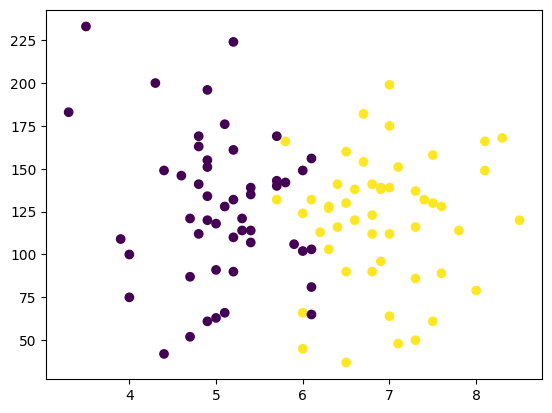

In [215]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [216]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [217]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [218]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [219]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [220]:
X_train.shape

(90, 2)

In [221]:
X_test.shape

(10, 2)

In [222]:
y_train.shape

(90,)

In [223]:
y_test.shape

(10,)

The StandardScaler is a feature scaling technique that transforms your data so that each feature has:

Mean = 0

Standard deviation = 1

This process is called standardization or z-score normalization

In [224]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [225]:
X_train=scaler.fit_transform(X_train)

In [226]:
X_train

array([[-0.63413616,  2.46837816],
       [-0.7253059 ,  1.28052101],
       [-0.45179669,  0.36488112],
       [-1.08998484, -0.92196413],
       [-0.90764537,  0.76083351],
       [-0.54296643, -0.08056531],
       [-0.99881511, -0.30328853],
       [ 0.73340987,  1.42900315],
       [ 0.91574935,  0.3401341 ],
       [ 0.45990067, -0.20430043],
       [-0.90764537,  0.241146  ],
       [ 0.09522172, -1.96133914],
       [ 1.28042829, -0.94671115],
       [-0.90764537, -1.56538675],
       [ 1.00691908,  1.84970256],
       [ 0.82457961, -0.84772306],
       [ 0.82457961, -0.03107126],
       [-0.45179669, -0.42702365],
       [-1.81934273, -0.3775296 ],
       [-0.99881511,  0.41437517],
       [-0.45179669, -0.25379448],
       [ 1.00691908,  0.36488112],
       [ 1.5539375 ,  0.09266386],
       [ 0.91574935,  0.36488112],
       [ 1.37159803,  0.19165195],
       [ 2.37446512, -0.10531234],
       [-1.08998484, -1.78810997],
       [ 0.00405199, -0.45177067],
       [-0.90764537,

In [227]:
X_test = scaler.transform(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [228]:
clf=LogisticRegression()


In [229]:
clf.fit(X_train, y_train)

LogisticRegression()

In [230]:
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [231]:
y_test

,placement
65,1
44,1
29,1
22,0
83,1
57,1
67,0
42,1
78,0
53,1


In [232]:
accuracy_score(y_test, y_pred)

0.9

<Axes: >

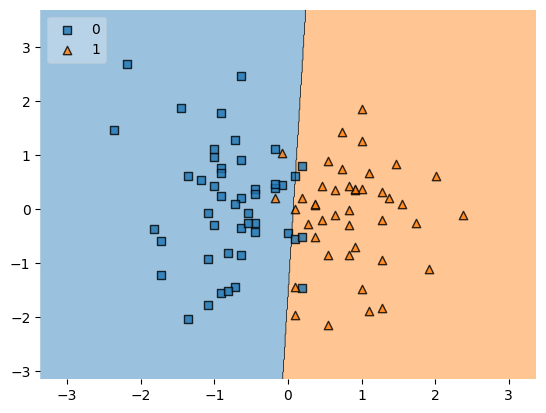

In [233]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [234]:
pickle.dump(clf, open('model.pkl','wb'))